# Exploratory Data Analysis - EDA

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Explore the data

In [4]:
data = pd.read_csv("all_stocks_5yr.csv")
data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


# Data Cleaning

In [6]:
# Check the missing values
data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [7]:
# Remove missing values
data.dropna()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [9]:
# Convert the date into datetime format
data['date'] = pd.to_datetime(data['date'])

In [10]:
# Check for duplicates
data.duplicated().sum()

0

In [11]:
# Handle outliers
q1 = data['close'].quantile(0.25)
q3 = data['close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
data = data[data['close'] <=upper_bound]

In [13]:
# Standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume']])

C:\Users\Dragan Golic\AppData\Local\Temp\ipykernel_13916\3353931313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume']])


In [14]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,-1.425507,-1.429292,-1.432927,-1.434785,0.435029,AAL
1,2013-02-11,-1.430533,-1.432339,-1.443347,-1.442883,0.488159,AAL
2,2013-02-12,-1.442820,-1.446189,-1.447853,-1.448188,0.403510,AAL
3,2013-02-13,-1.447009,-1.434278,-1.443628,-1.437299,0.642396,AAL
4,2013-02-14,-1.429137,-1.433724,-1.474326,-1.456007,3.063211,AAL


# Data Visualisation

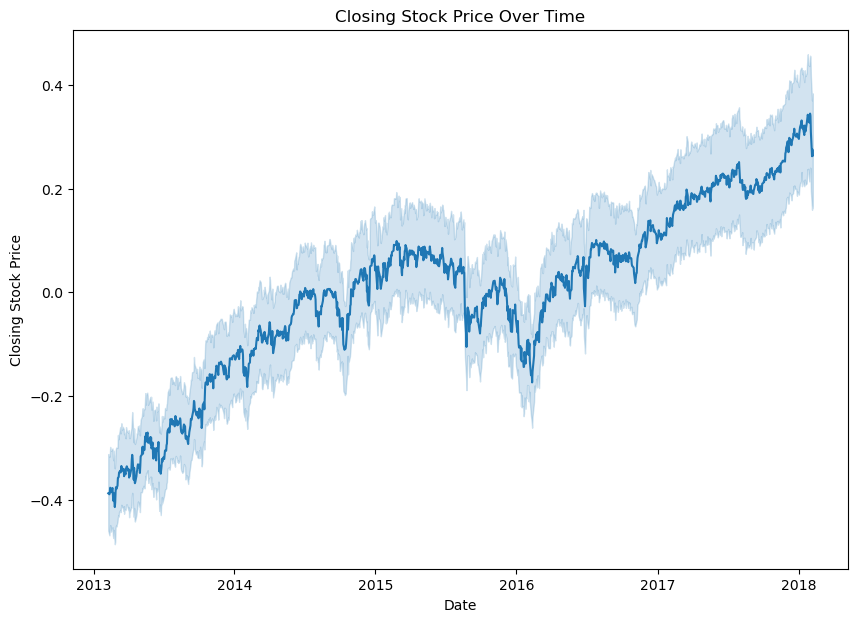

In [17]:
# Closing stock price over time
plt.figure(figsize=(10, 7))
sns.lineplot(x='date', y='close', data=data)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

C:\Users\Dragan Golic\AppData\Local\Temp\ipykernel_13916\3847569630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['date'].dt.year


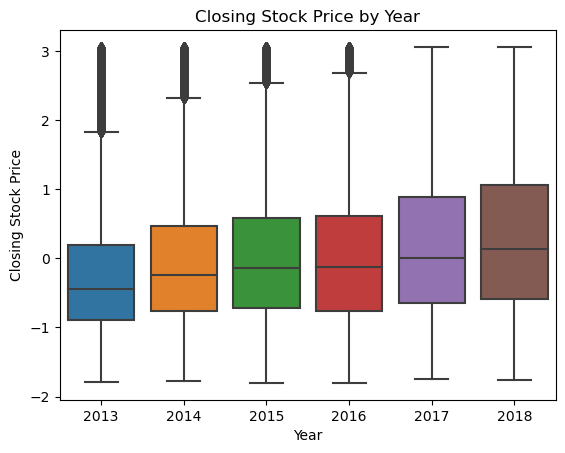

In [20]:
# Closing Stock Price using Box Plot
data['year'] = data['date'].dt.year
sns.boxplot(x='year', y='close', data=data)
plt.title('Closing Stock Price by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

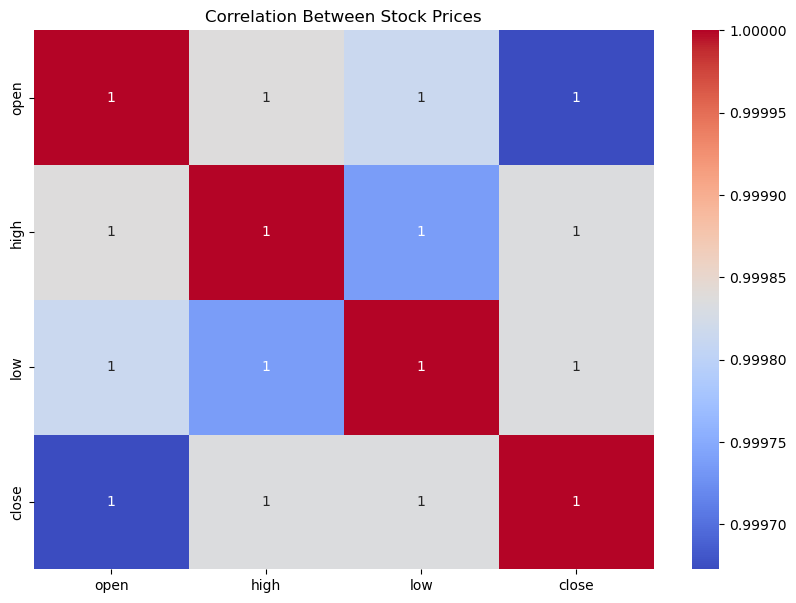

In [23]:
# Correlation between the stock prices
corr = data[['open', 'high', 'low', 'close']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

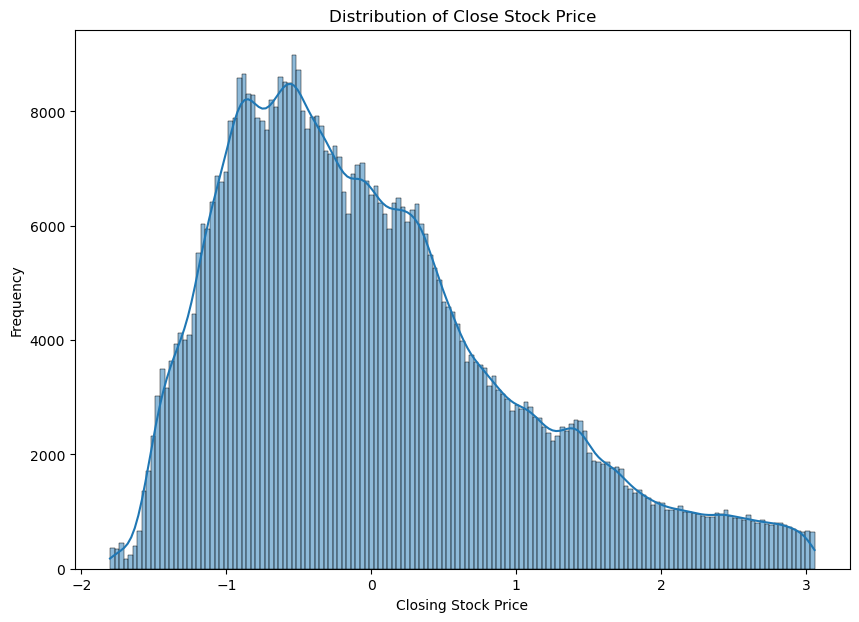

In [24]:
# Distribution of the Close Stock Price
plt.figure(figsize=(10,7))
sns.histplot(data['close'], kde=True)
plt.title('Distribution of Close Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Filtering the Companies 
data.head()

,date,open,high,low,close,volume,Name,yesy,year
0,2013-02-08,-1.425507,-1.429292,-1.432927,-1.434785,0.435029,AAL,2013,2013
1,2013-02-11,-1.430533,-1.432339,-1.443347,-1.442883,0.488159,AAL,2013,2013
2,2013-02-12,-1.442820,-1.446189,-1.447853,-1.448188,0.403510,AAL,2013,2013
3,2013-02-13,-1.447009,-1.434278,-1.443628,-1.437299,0.642396,AAL,2013,2013
4,2013-02-14,-1.429137,-1.433724,-1.474326,-1.456007,3.063211,AAL,2013,2013


In [27]:
data['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD',
       'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK',
       'AXP', 'AYI', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY', 'BDX', 'BEN',
       'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLL', 'BMY', 'BRK.B', 'BSX',
       'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA', 'CBG', 'CBOE', 'CBS',
       'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CFG', 'CF', 'CHD',
       'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA',
       'CME', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO',
       'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSRA', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'C', 

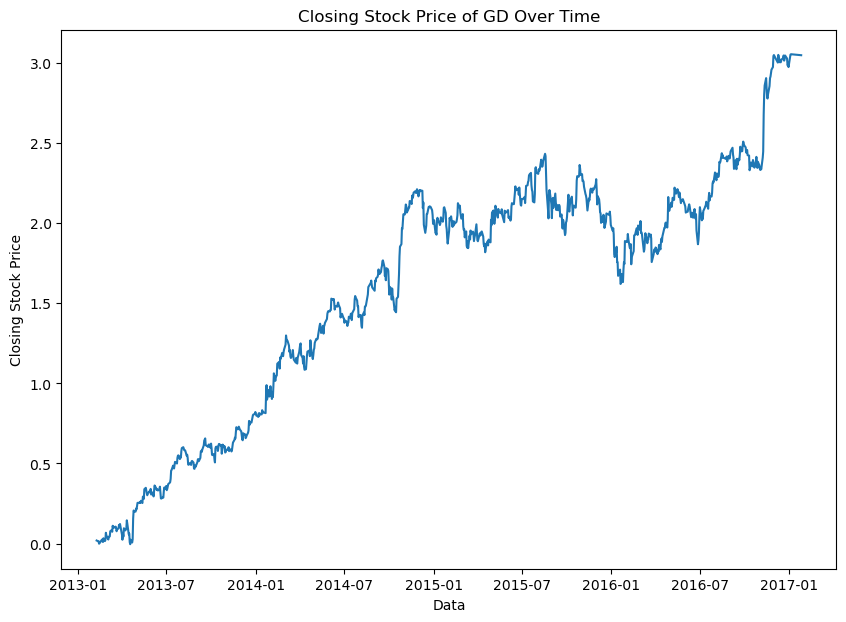

In [38]:
# Line charts for the Company 'GD' 
company_name = 'GD'
company_df = data[data['Name']==company_name]
plt.figure(figsize=(10,7))
sns.lineplot(x='date', y='close', data=company_df)
plt.title(f'Closing Stock Price of {company_name} Over Time')
plt.xlabel("Data")
plt.ylabel('Closing Stock Price')
plt.show()

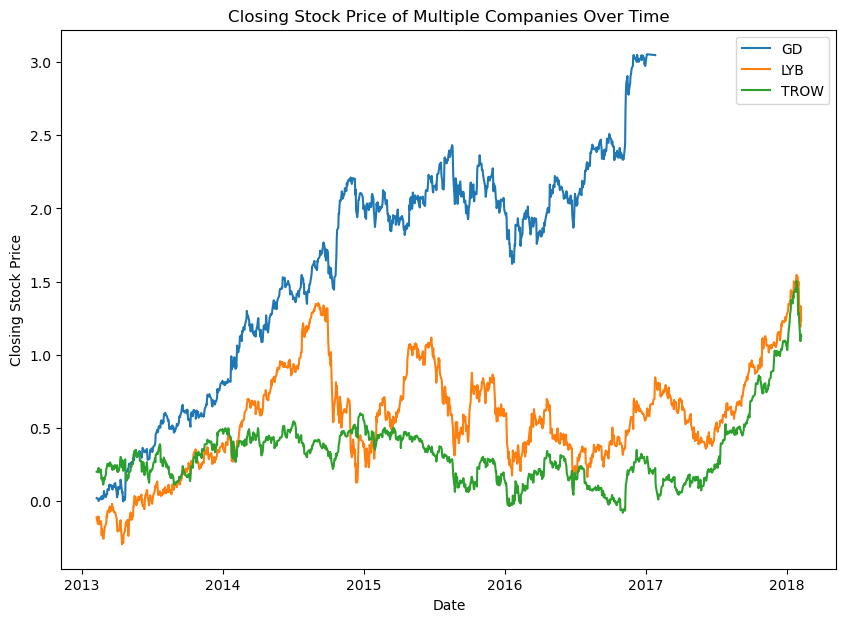

In [46]:
# line Chart for closing stock price for multiple companies over time compared wit GD Company
companies = ['GD', 'LYB', 'TROW']
plt.figure(figsize=(10,7))
for company in companies:
    company_df = data[data['Name'] == company]
    sns.lineplot(x='date', y='close', data=company_df, label=company)
plt.title("Closing Stock Price of Multiple Companies Over Time")
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.legend()
plt.show()

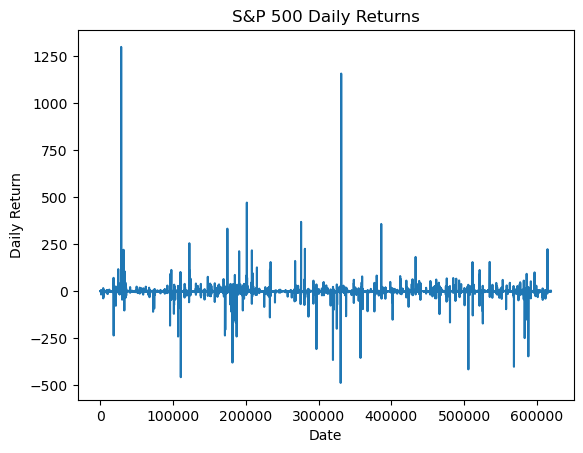

In [47]:
# Line chart for daily returns over time
daily_returns = data['close'].pct_change()
plt.plot(daily_returns.index, daily_returns.values)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

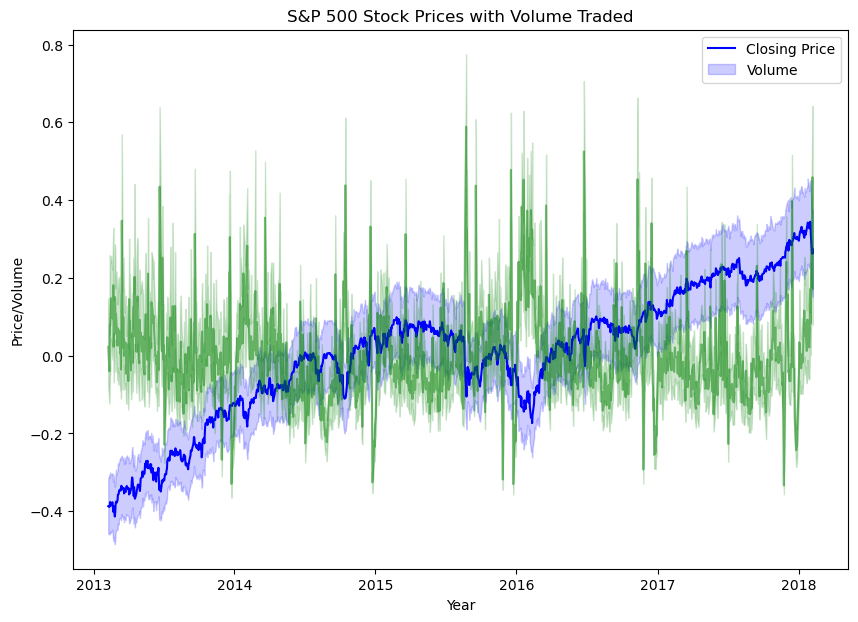

In [48]:
# Combination plot of stock prices and volume traded
plt.figure(figsize=(10,7))
sns.lineplot(x='date', y='close', data=data, color='b')
sns.lineplot(x='date', y='volume', data=data, color='g', alpha=0.5)
plt.title('S&P 500 Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Closing Price', 'Volume'])
plt.show()

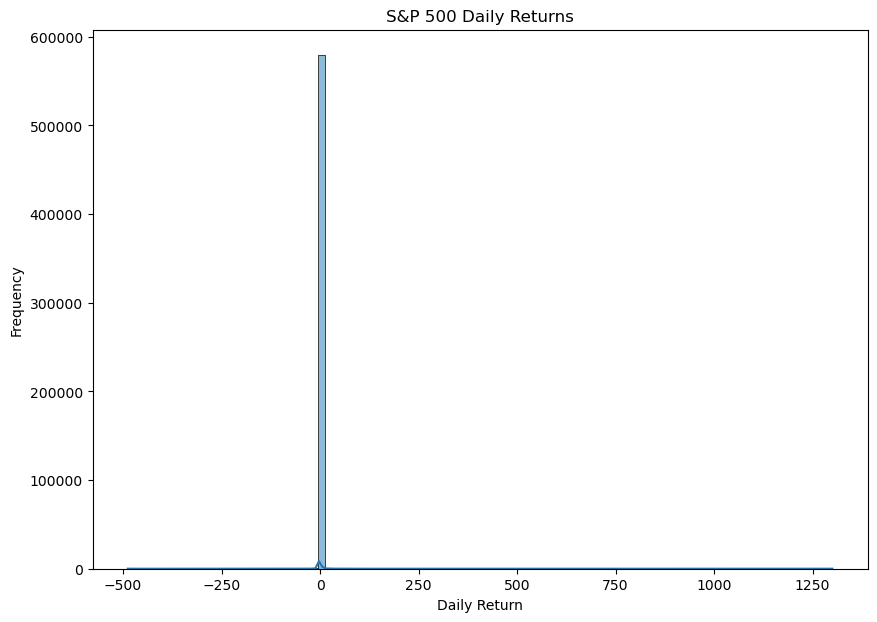

In [49]:
# Histogram of the daily returns
plt.figure(figsize=(10,7))
sns.histplot(data['close'].pct_change().dropna(), bins=100, kde=True)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()